SQL to create full data set and steps to clean dataframe

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [2]:
data = pd.read_sql("""
                   SELECT rps.documentdate ::date
                       ,rps.saleprice :: numeric(10,2)
                       ,rps.propertytype 
                       ,rps.principaluse 
                       ,rps.saleinstrument :: int
                       ,rps.currentuseland 
                       ,rps.historicproperty
                       ,rps.salereason :: int
                       ,rps.propertyclass :: int 
                       ,SUBSTRING (rb.zipcode, 1,5) AS zipcode
                       ,rb.streettype
                       ,rb.stories
                       ,rb.buildinggrade :: int
                       ,rb.squarefeettotalliving :: int
                       ,rb.squarefeettotalbasement :: int
                       ,rb.squarefeetgarageattached
                       ,rb.squarefeetopenporch :: int
                       ,rb.squarefeetdeck :: int
                       ,rb.bedrooms :: int
                       ,rb.BathHalfCount :: int
                       ,rb.Bath3qtrCount :: int
                       ,rb.BathFullCount :: int
                       ,rb.FireplaceSingleStory 
                       ,rb.FireplaceMultipleStory 
                       ,rb.FireplaceFreeStanding 
                       ,rb.FireplaceAdditional 
                       ,rb.YearBuilt :: int
                       ,rb.YearRenovated :: int
                       ,rb.PercentComplete 
                       ,rb.Obsolescence 
                       ,rb.PercentNetCondition
                       ,rb.Condition 
                       ,p.township 
                       ,p.propertytype
                       ,p.districtname
                       ,p.levycode
                       ,p.lotsquarefootage
                       ,p.watersystem 
                       ,p.access 
                       ,p.topography 
                       ,p.ViewMtRanier 
                       ,p.ViewOlympics 
                       ,p.ViewCascades 
                       ,p.ViewTerritorial 
                       ,p.ViewSeattleSkyline 
                       ,p.ViewPugetSound
                       ,p.ViewLakeWashington 
                       ,p.ViewLakeSammamish 
                       ,p.ViewSmallLakeRiverCreek 
                       ,p.ViewOtherView 
                       ,p.WaterfrontLocation 
                       ,p.WaterfrontFootage 
                       ,p.WaterfrontBank 
                       ,p.WaterfrontPoorQualtiy 
                       ,p.WaterfrontRestrictedAccess 
                       ,p.WaterfrontAccessRights 
                       ,p.WaterfrontProximityInfluence
                       ,p.TidelandShoreland 
                       ,p.LotDepthFactopr 
                       ,p.TrafficNoise 
                       ,p.AirportNoise 
                       ,p.PowerLines 
                       ,p.OtherNuisances 
                FROM real_property_sales rps
                JOIN residential_building rb
                     ON rps.major = rb.major
                     AND rps.minor = rb.minor
                JOIN parcel p
                     ON p.major = rps.major
                     AND p.minor = rps.minor
                WHERE  (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                        AND (rps.saleinstrument = '3' OR rps.saleinstrument = '2');
                """, conn)

In [ ]:
data.to_csv('../asp_original')

In [16]:
data.shape

(18182, 63)

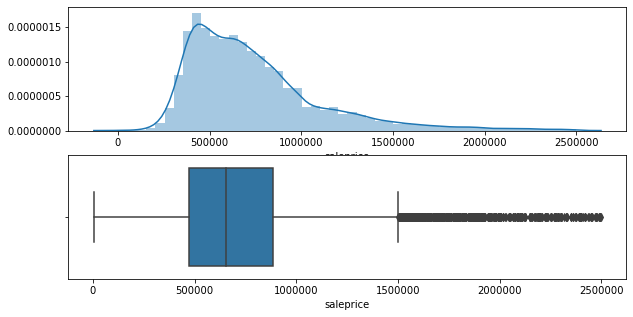

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.saleprice, ax = ax[0])
sns.boxplot(data.saleprice, ax= ax[1]);

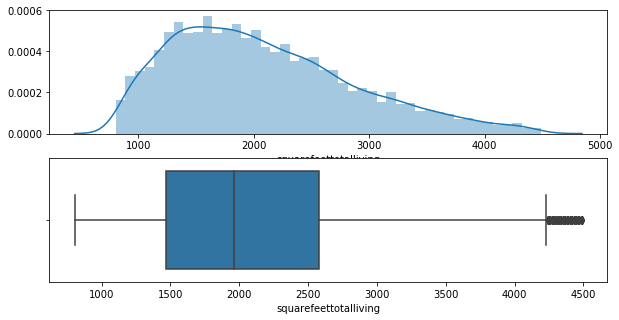

In [8]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.squarefeettotalliving, ax = ax[0])
sns.boxplot(data.squarefeettotalliving, ax= ax[1]);

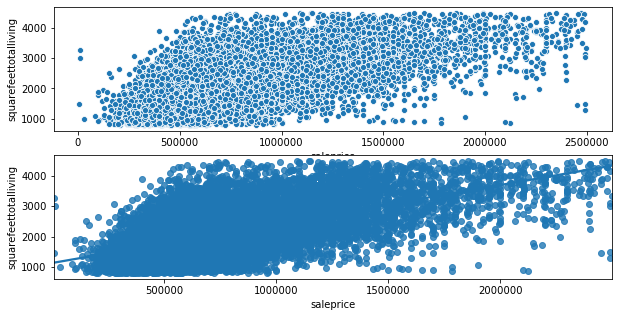

In [11]:
x = data.saleprice
y = data.squarefeettotalliving
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.scatterplot(x,y, ax = ax [0])
sns.regplot(x,y, ax = ax [1])

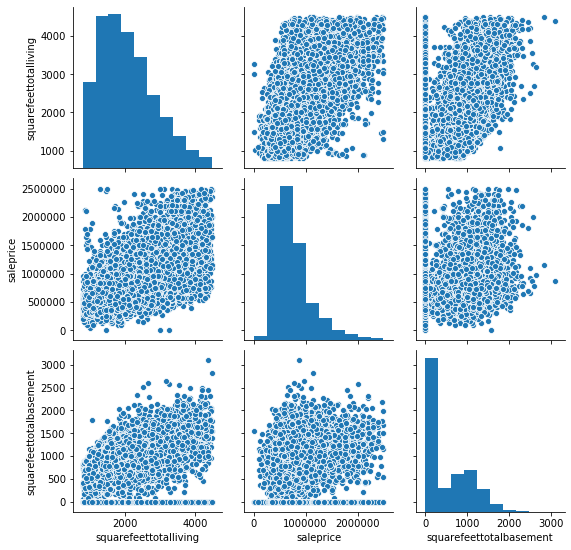

In [12]:
sns.pairplot(data = data[['squarefeettotalliving','saleprice','squarefeettotalbasement']])

In [13]:
data.corr()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,stories,buildinggrade,squarefeettotalliving,squarefeettotalbasement,...,percentcomplete,obsolescence,percentnetcondition,condition,township,lotsquarefootage,watersystem,access,topography,lotdepthfactopr
saleprice,1.000000,-0.010882,NaN,NaN,NaN,-0.034267,0.283269,0.621155,0.599055,0.218212,...,0.028948,-0.004655,-0.007759,-0.040216,0.465432,0.059927,0.009014,-0.056276,0.137257,0.088766
propertytype,-0.010882,1.000000,NaN,NaN,NaN,-0.008178,0.062402,-0.004839,-0.045272,-0.003547,...,0.018020,-0.003857,-0.001116,-0.045771,0.032058,-0.027756,0.013967,-0.015227,-0.012537,-0.002437
principaluse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saleinstrument,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salereason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
propertyclass,-0.034267,-0.008178,NaN,NaN,NaN,1.000000,-0.035800,0.000111,0.019352,-0.001656,...,-0.069799,0.003406,-0.070939,0.045803,-0.050823,0.014436,-0.029413,-0.005678,0.015184,0.004842
stories,0.283269,0.062402,NaN,NaN,NaN,-0.035800,1.000000,0.432634,0.329690,-0.276218,...,0.060025,-0.008358,-0.012256,-0.288014,0.087652,-0.038847,0.019608,0.001166,-0.002641,-0.001298
buildinggrade,0.621155,-0.004839,NaN,NaN,NaN,0.000111,0.432634,1.000000,0.692027,0.019873,...,0.036285,-0.023711,-0.008689,-0.207184,0.151420,0.070989,-0.000810,-0.071810,0.099248,0.015130
squarefeettotalliving,0.599055,-0.045272,NaN,NaN,NaN,0.019352,0.329690,0.692027,1.000000,0.223636,...,0.010717,-0.018987,-0.007904,-0.101283,0.053473,0.132449,-0.051075,-0.079125,0.128347,0.011047
squarefeettotalbasement,0.218212,-0.003547,NaN,NaN,NaN,-0.001656,-0.276218,0.019873,0.223636,1.000000,...,-0.006185,0.014880,-0.007440,0.114612,0.178114,-0.016487,0.024938,0.008286,0.151063,0.022240
